## KNN task on glass dataset

#### import the all necessary libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score


In [75]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [76]:
df.shape

(214, 10)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [78]:
y=df['Type']
X=df.drop(columns=['Type'],axis=1)

In [79]:
X.shape

(214, 9)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [81]:
x_train.shape

(171, 9)

In [82]:
x_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00
114,1.51847,13.10,3.97,1.19,72.44,0.60,8.43,0.0,0.00
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.0,0.00


In [83]:
# Scaling Data
'''
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
'''

'\nscaler = MinMaxScaler()\nx_train = scaler.fit_transform(x_train)\nx_test = scaler.transform(x_test)\n'

In [84]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [85]:
x_train

array([[-0.25250328,  0.59026293,  0.66481403, ..., -0.76058626,
        -0.37331771, -0.58864221],
       [ 0.99041963, -0.49035608,  0.69938291, ...,  0.59183681,
        -0.37331771,  1.11402735],
       [-0.48137911, -0.97920754,  0.16702224, ..., -0.28522964,
        -0.37331771, -0.58864221],
       ...,
       [ 0.18299656,  0.19146306,  0.49196966, ..., -0.03750858,
        -0.37331771, -0.58864221],
       [ 1.05399625,  0.06281794,  0.76160688, ...,  0.43115288,
        -0.37331771,  0.11245702],
       [ 0.99041963, -0.40030449,  0.65098648, ...,  0.57175132,
        -0.37331771,  1.01387031]], shape=(171, 9))

In [86]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.627906976744186

In [88]:
scores=[]

for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))

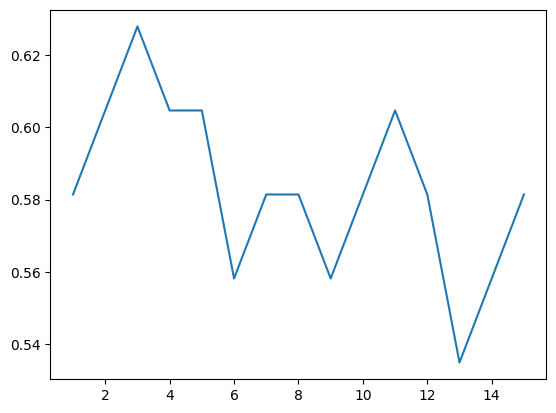

In [89]:
plt.plot(range(1,16),scores)

In [100]:
df['Type']

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

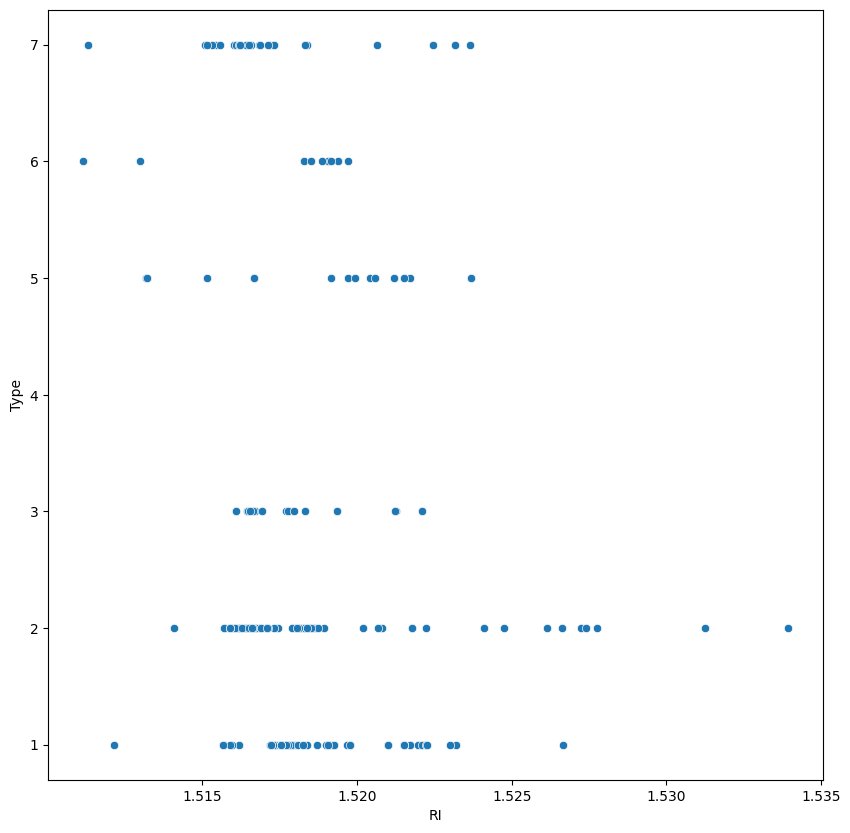

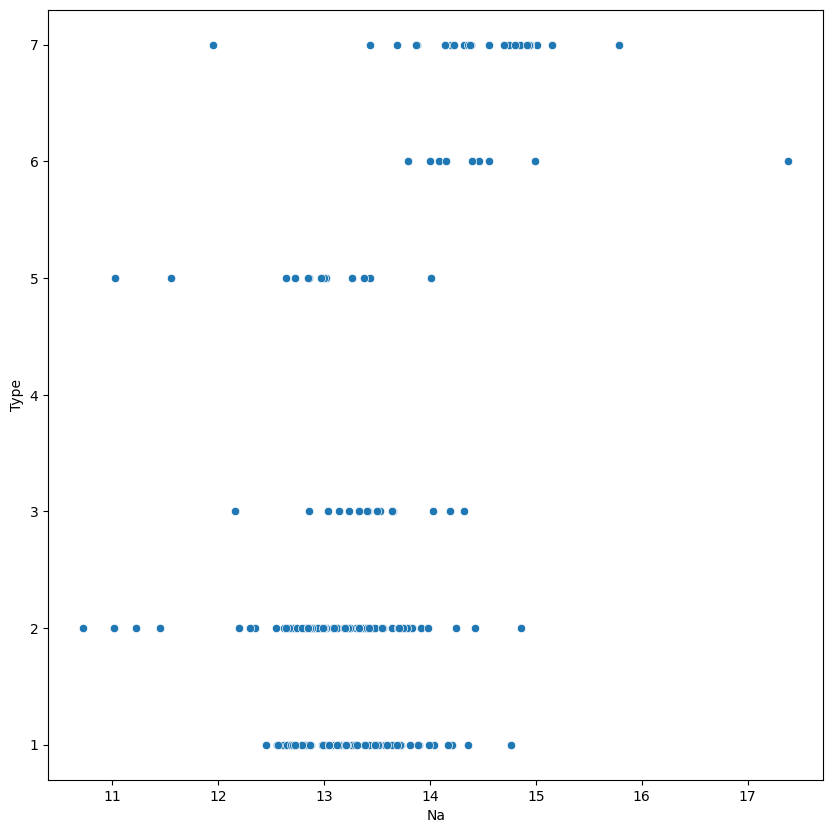

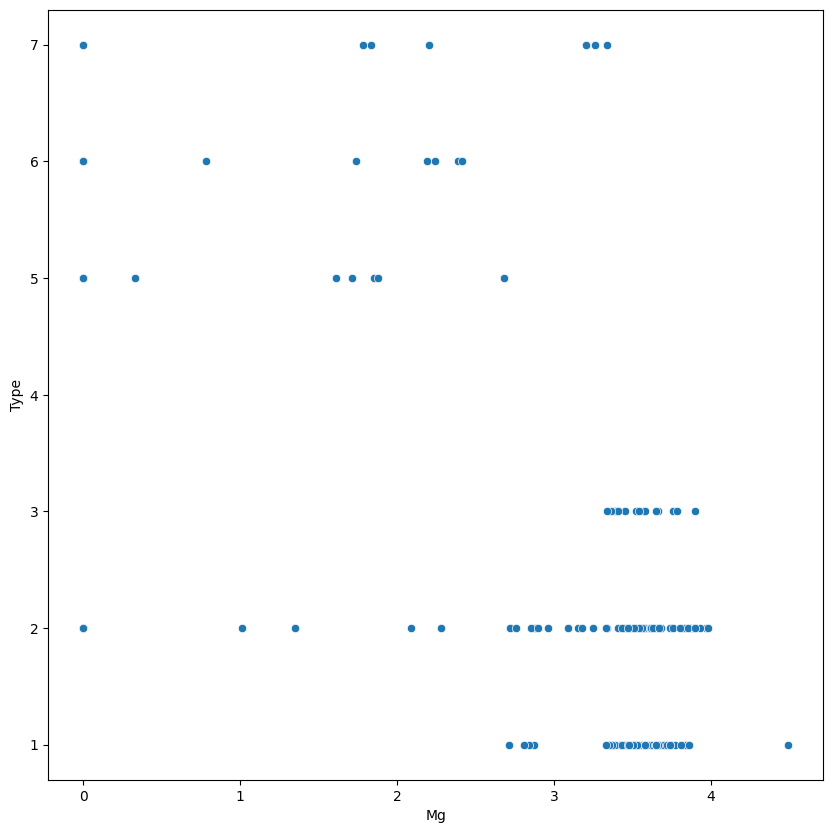

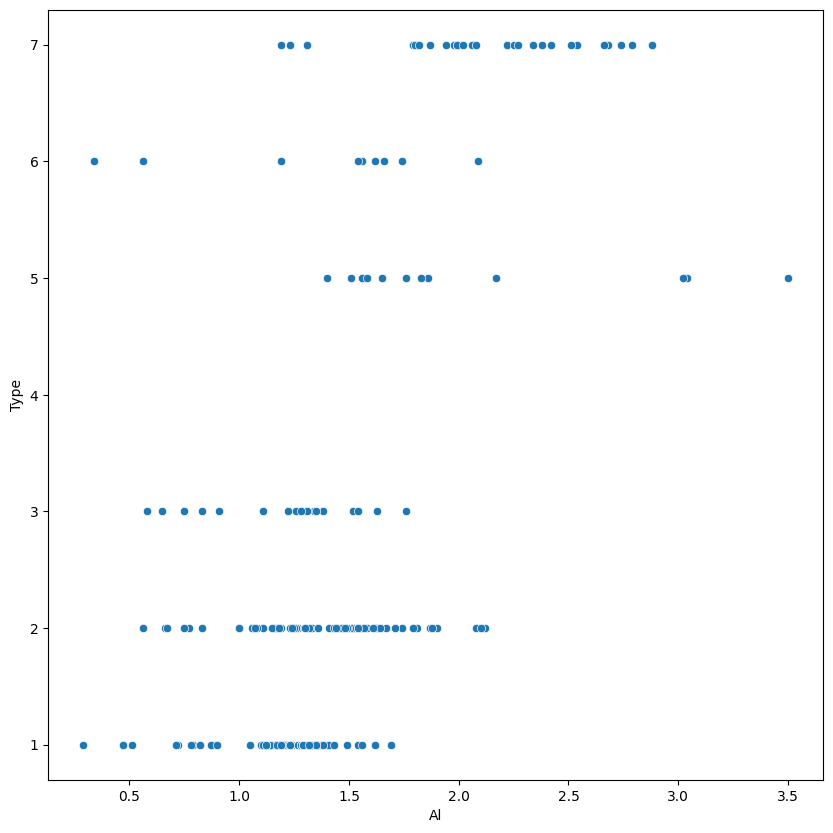

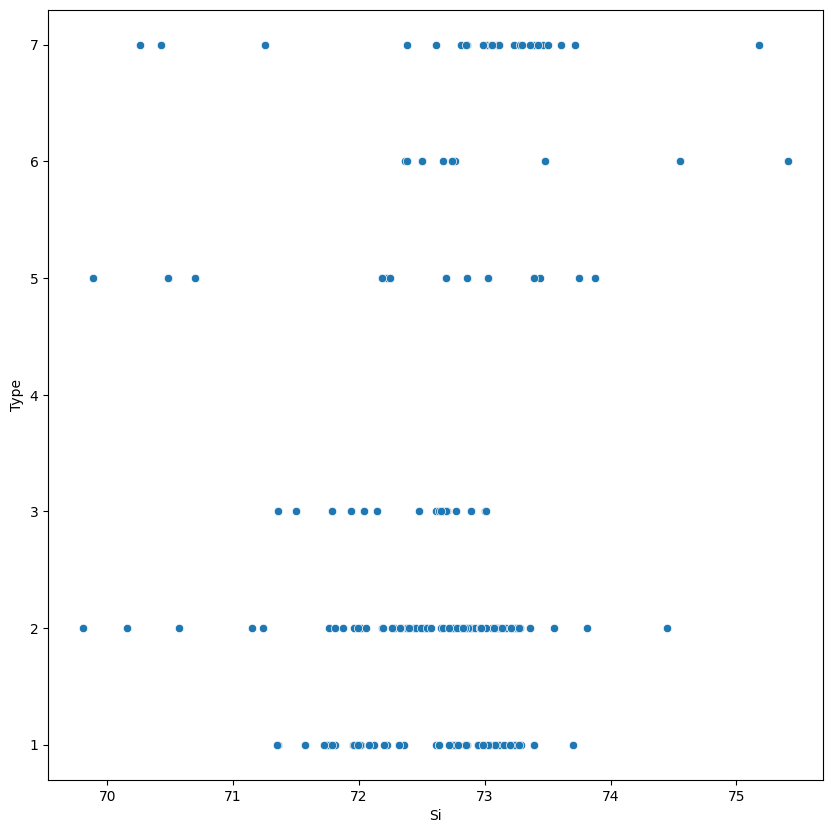

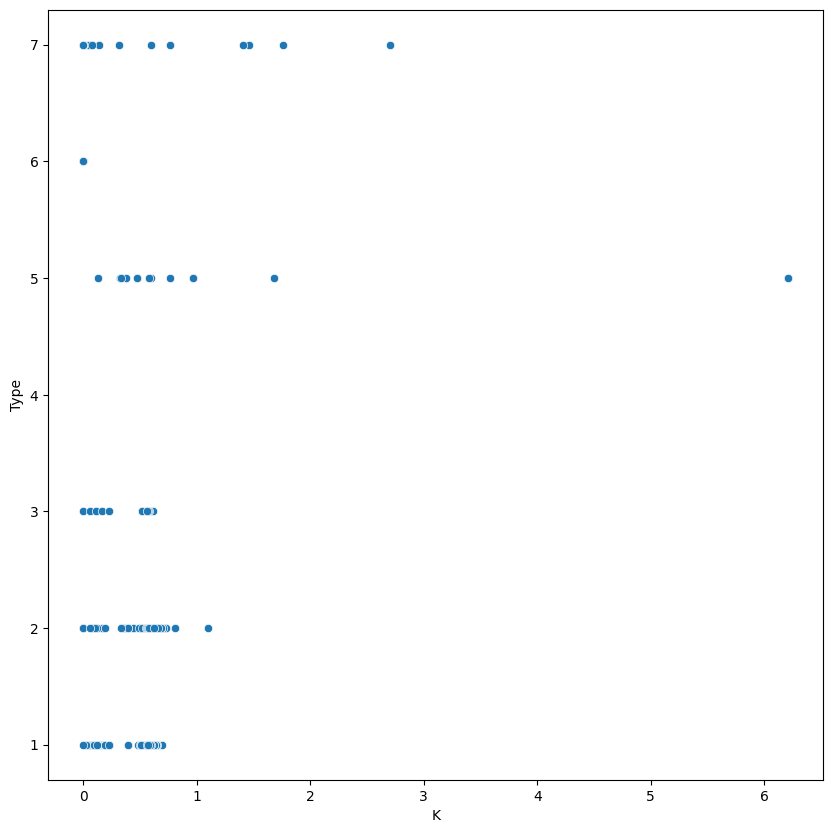

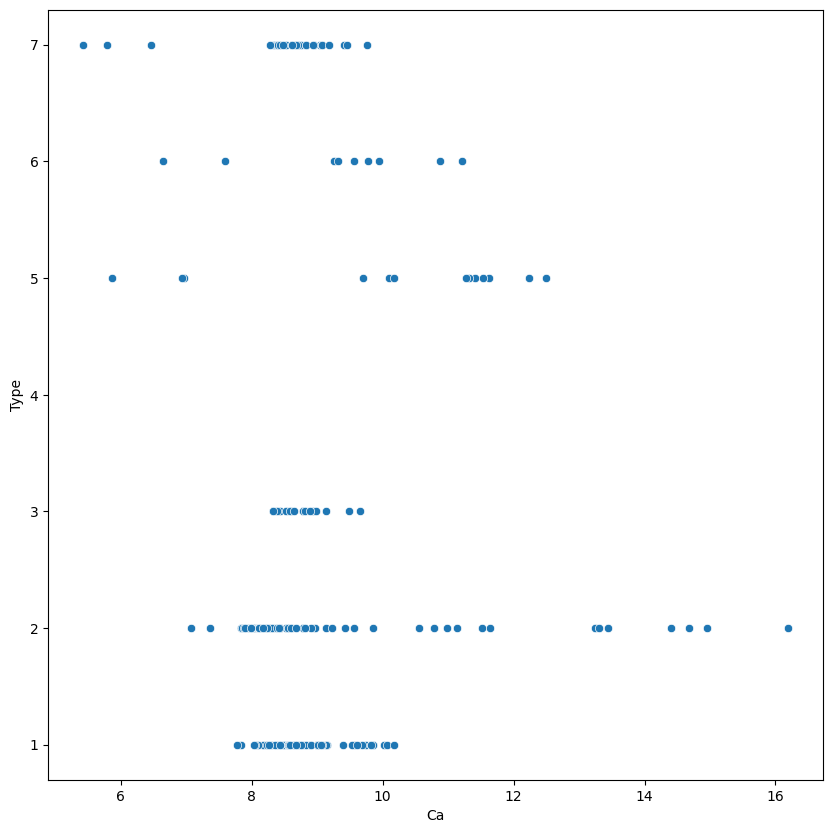

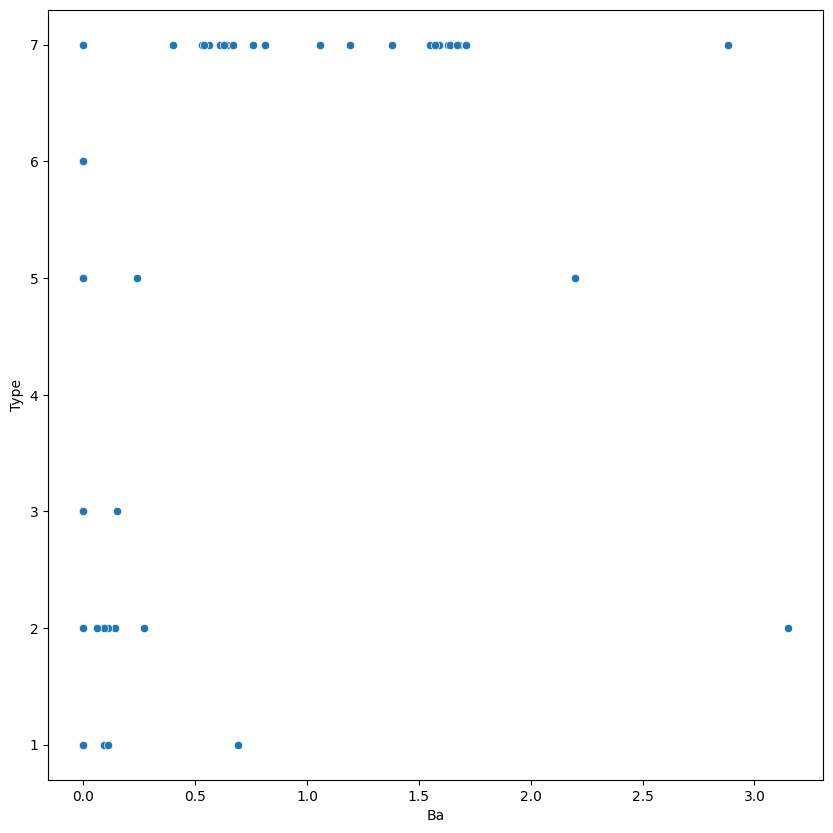

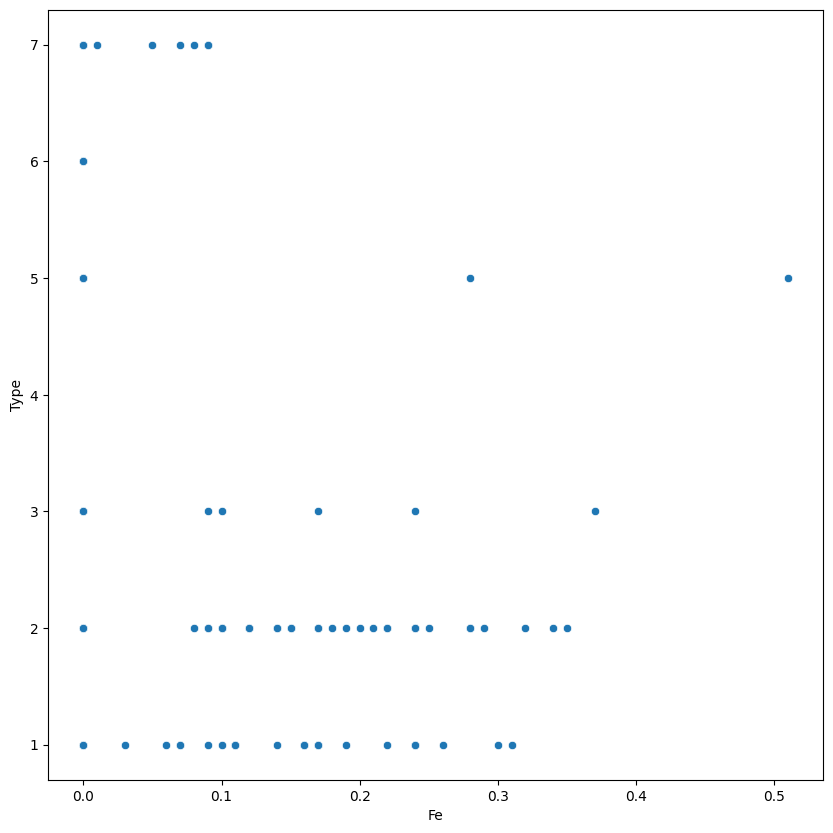

In [103]:
for i in df:
    if(i != "Type"):
        plt.figure(figsize = (10, 10))
        sns.scatterplot(x = df[i], y = df["Type"], data = df)

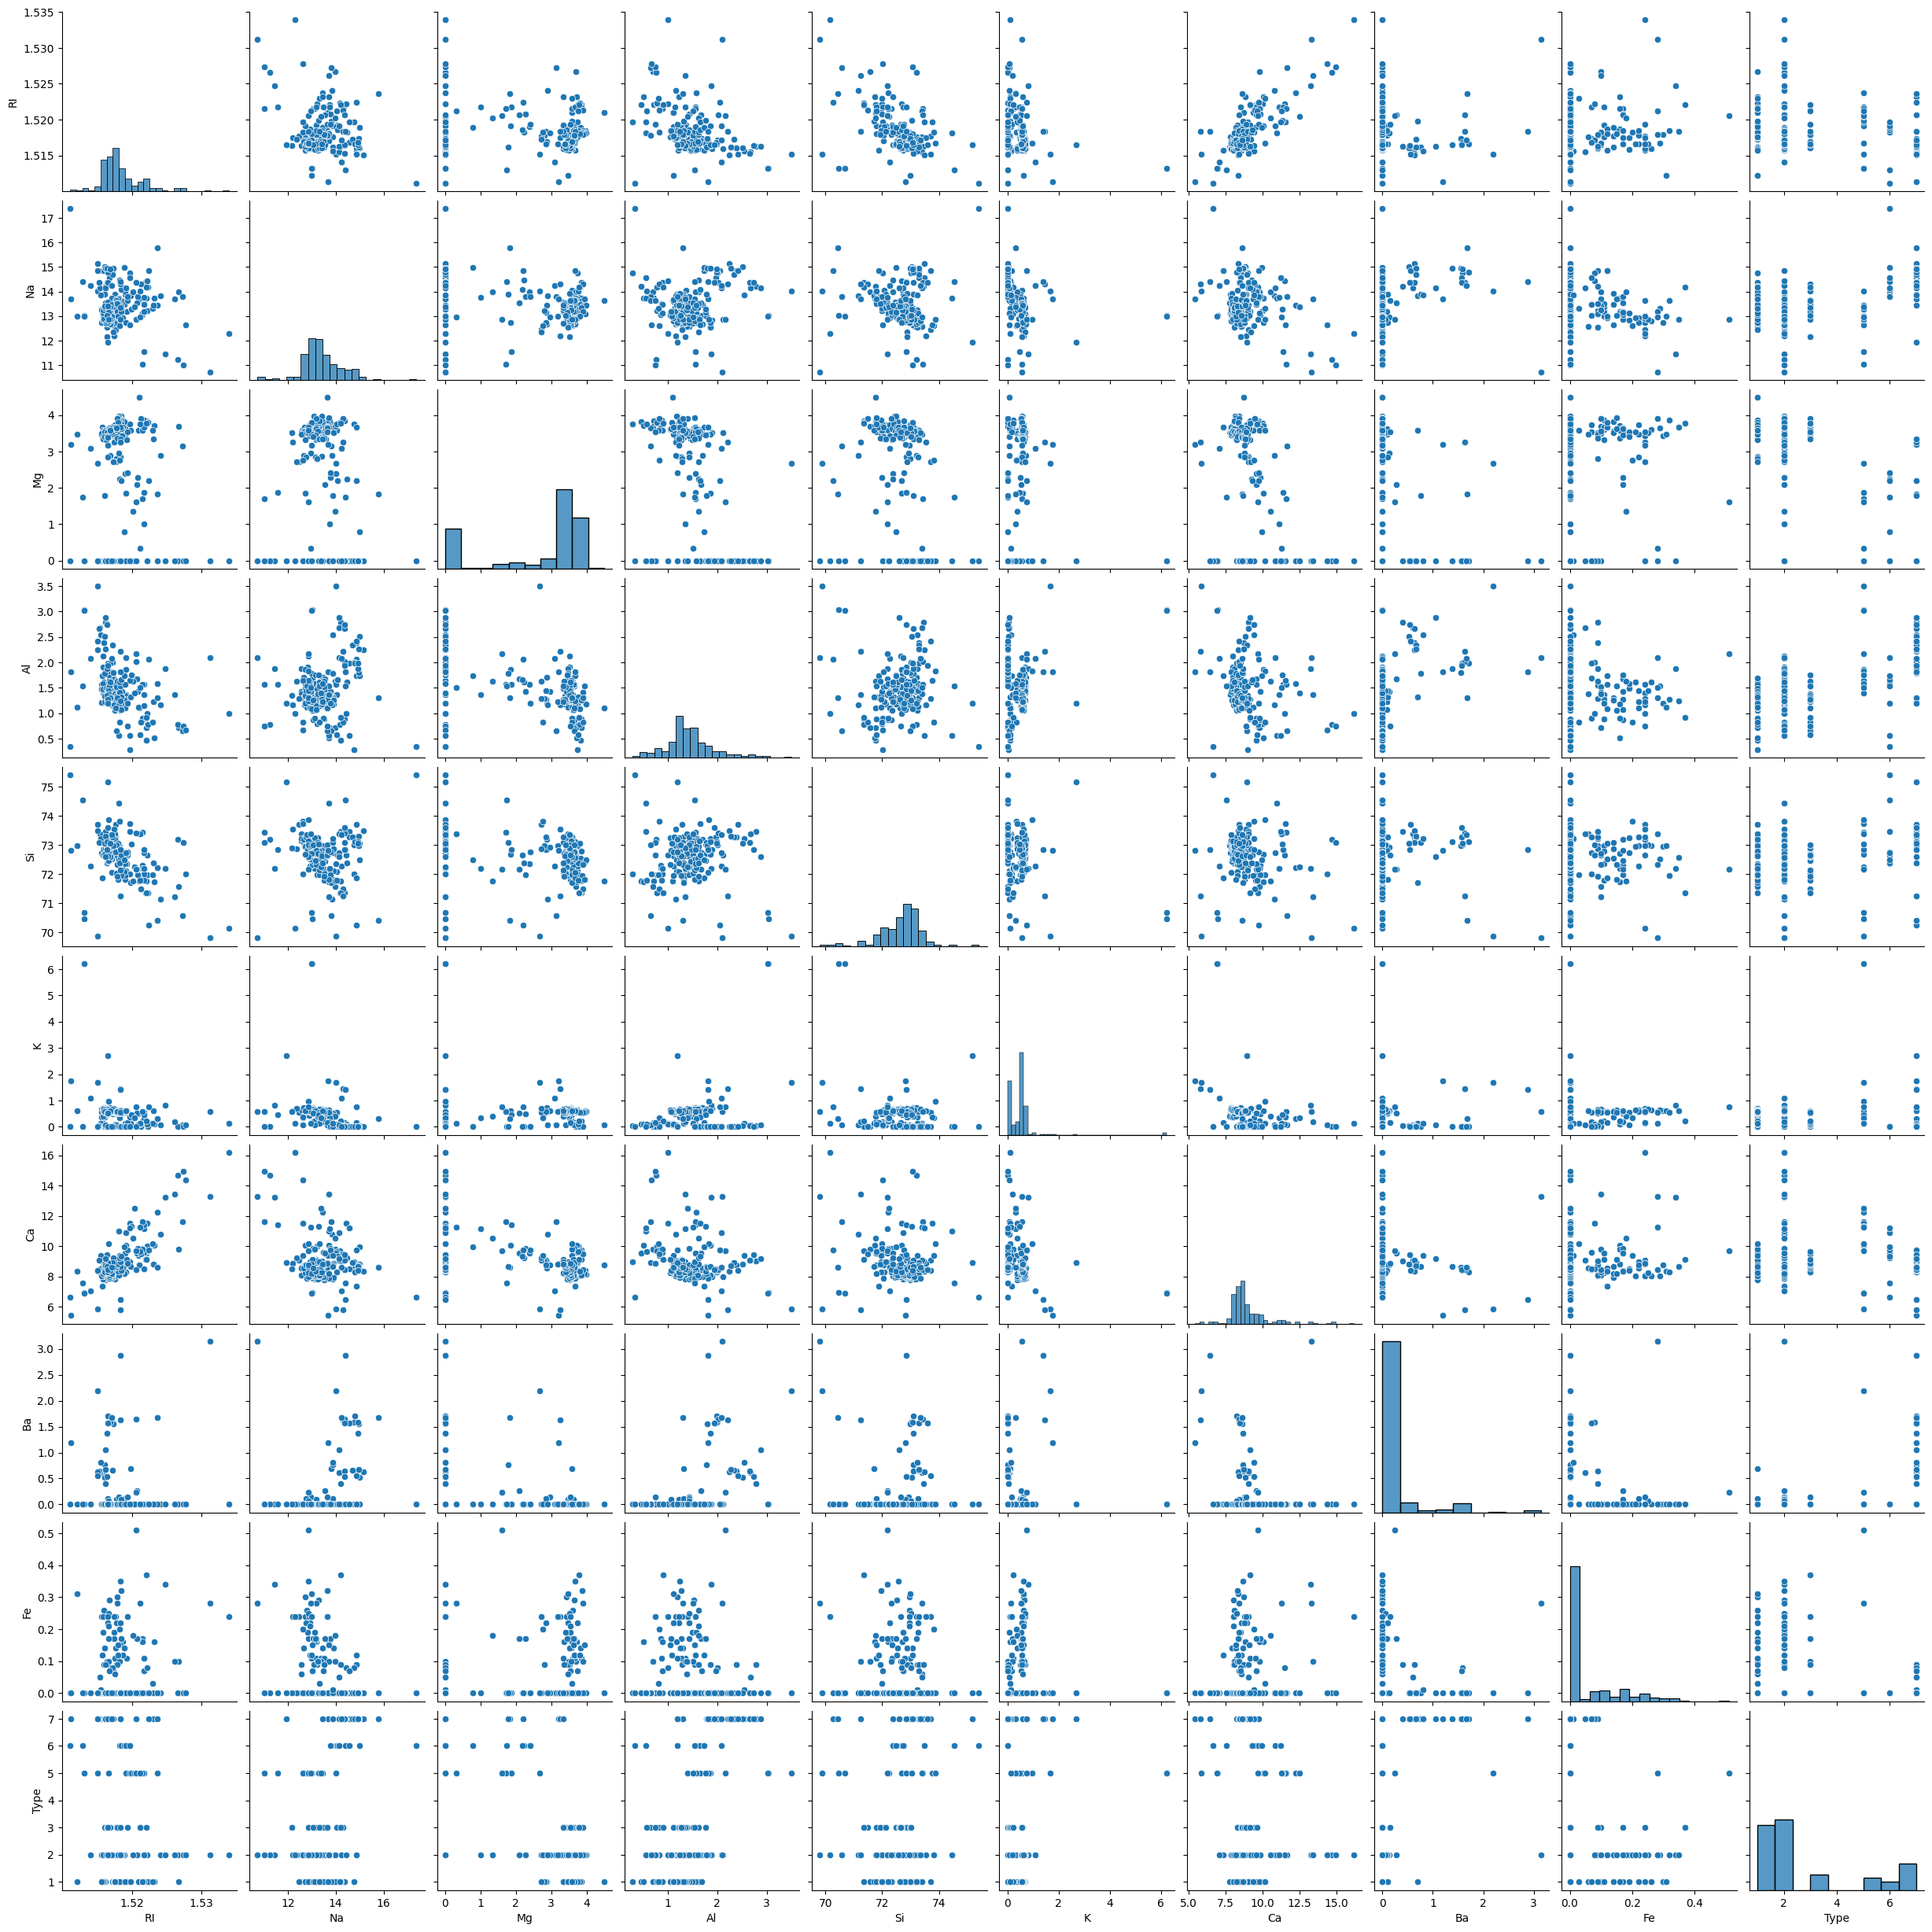

In [104]:
sns.pairplot(df)